In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import struct
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, models, losses
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Flatten
from keras.datasets import mnist
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [2]:
def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
    return images

def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels
train_images_path = '/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels_path = '/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images_path = '/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_path = '/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

train_images = load_mnist_images(train_images_path)
train_labels = load_mnist_labels(train_labels_path)
test_images = load_mnist_images(test_images_path)
test_labels = load_mnist_labels(test_labels_path)

In [8]:
normalized_train_images = train_images/255.
normalized_test_images = test_images/255.

In [3]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


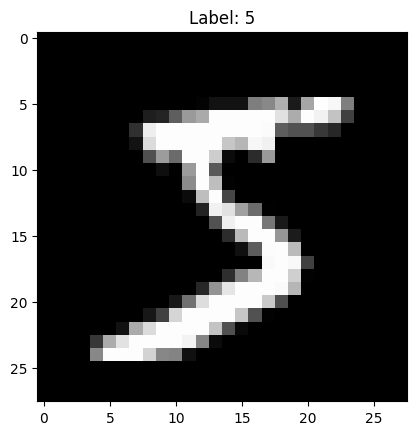

In [4]:
# Display the first image in the training set
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


# Attempt 1 CNN

In [42]:
def initialize_cnn(window_width):
    input_shape = (28, 28, 1)
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(64, (window_width, window_width), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(128, (window_width, window_width), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (window_width, window_width), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(10, activation = 'softmax'))
    return model

In [43]:
model = initialize_cnn(3)


In [44]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(normalized_train_images, train_labels, epochs = 15, validation_data=(normalized_test_images, test_labels))


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 50ms/step - accuracy: 0.8403 - loss: 0.5145 - val_accuracy: 0.9793 - val_loss: 0.0712
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 51ms/step - accuracy: 0.9593 - loss: 0.1330 - val_accuracy: 0.9833 - val_loss: 0.0553
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 49ms/step - accuracy: 0.9695 - loss: 0.1009 - val_accuracy: 0.9843 - val_loss: 0.0502
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.9727 - loss: 0.0885 - val_accuracy: 0.9866 - val_loss: 0.0455
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9752 - loss: 0.0797 - val_accuracy: 0.9864 - val_loss: 0.0471
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 50ms/step - accuracy: 0.9783 - loss: 0.0706 - val_accuracy: 0.9852 - val_loss: 0.0536
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 51ms/step - accuracy: 0.9804 - loss: 0.0644 - val_accuracy: 0.9875 - val_loss: 0.0434
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 50ms/step - accuracy: 0.9801

# Attempt 2 Flatten image, apply dense neural net

In [9]:
def initialize_neural_net():
    input_shape = (28, 28)
    
    model = models.Sequential()
    
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(32, activation = 'relu'))
    model.add(layers.Dense(128, activation = 'relu'))
    model.add(layers.Dense(10, activation = 'softmax'))
    return model

In [10]:
model = initialize_neural_net()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(normalized_train_images, train_labels, epochs = 15, validation_data=(normalized_test_images, test_labels))


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8443 - loss: 0.5351 - val_accuracy: 0.9446 - val_loss: 0.1779
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9533 - loss: 0.1556 - val_accuracy: 0.9640 - val_loss: 0.1226
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9649 - loss: 0.1146 - val_accuracy: 0.9653 - val_loss: 0.1136
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9734 - loss: 0.0872 - val_accuracy: 0.9698 - val_loss: 0.0984
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9757 - loss: 0.0772 - val_accuracy: 0.9618 - val_loss: 0.1222
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9788 - loss: 0.0645 - val_accuracy: 0.9709 - val_loss: 0.0954
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9825 - loss: 0.0567 - val_accuracy: 0.9707 - val_loss: 0.0997
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9843 - loss: 0.0483 - 

# Why does this work so well?

In [51]:
dummy_input = np.random.random((1, 28, 28))
model.predict(dummy_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[<KerasTensor shape=(None, 28, 28), dtype=float32, sparse=None, name=keras_tensor_11>]

In [54]:
extractor = keras.Model(inputs=model.inputs,
                        outputs=[layer.output for layer in model.layers])
features = extractor(normalized_train_images)

In [59]:
example = extractor(normalized_train_images[0].reshape(1, 28, 28))

In [100]:
activations_dict_layer_1 = dict()
activations_dict_layer_2 = dict()

for image, label in zip(normalized_train_images, train_labels):
    activations = extractor(image.reshape(1, 28, 28))
    activations_dict_layer_1[label] = activations_dict_layer_1.get(label, []) + [activations[1]]
    activations_dict_layer_2[label] = activations_dict_layer_2.get(label, [])+ [activations[2]]

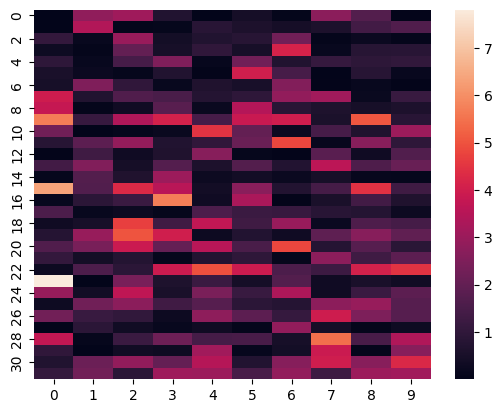

In [101]:
df = pd.DataFrame()

for i in range(10):
    df[i] = np.average(activations_dict_layer_1[i], axis=0)[0]
sns.heatmap(df)
plt.show()

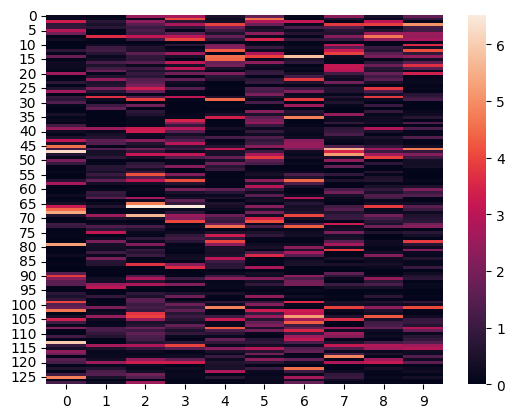

In [102]:
df_2 = pd.DataFrame()

for i in range(10):
    df_2[i] = np.average(activations_dict_layer_2[i], axis=0)[0]
sns.heatmap(df_2)
plt.show()

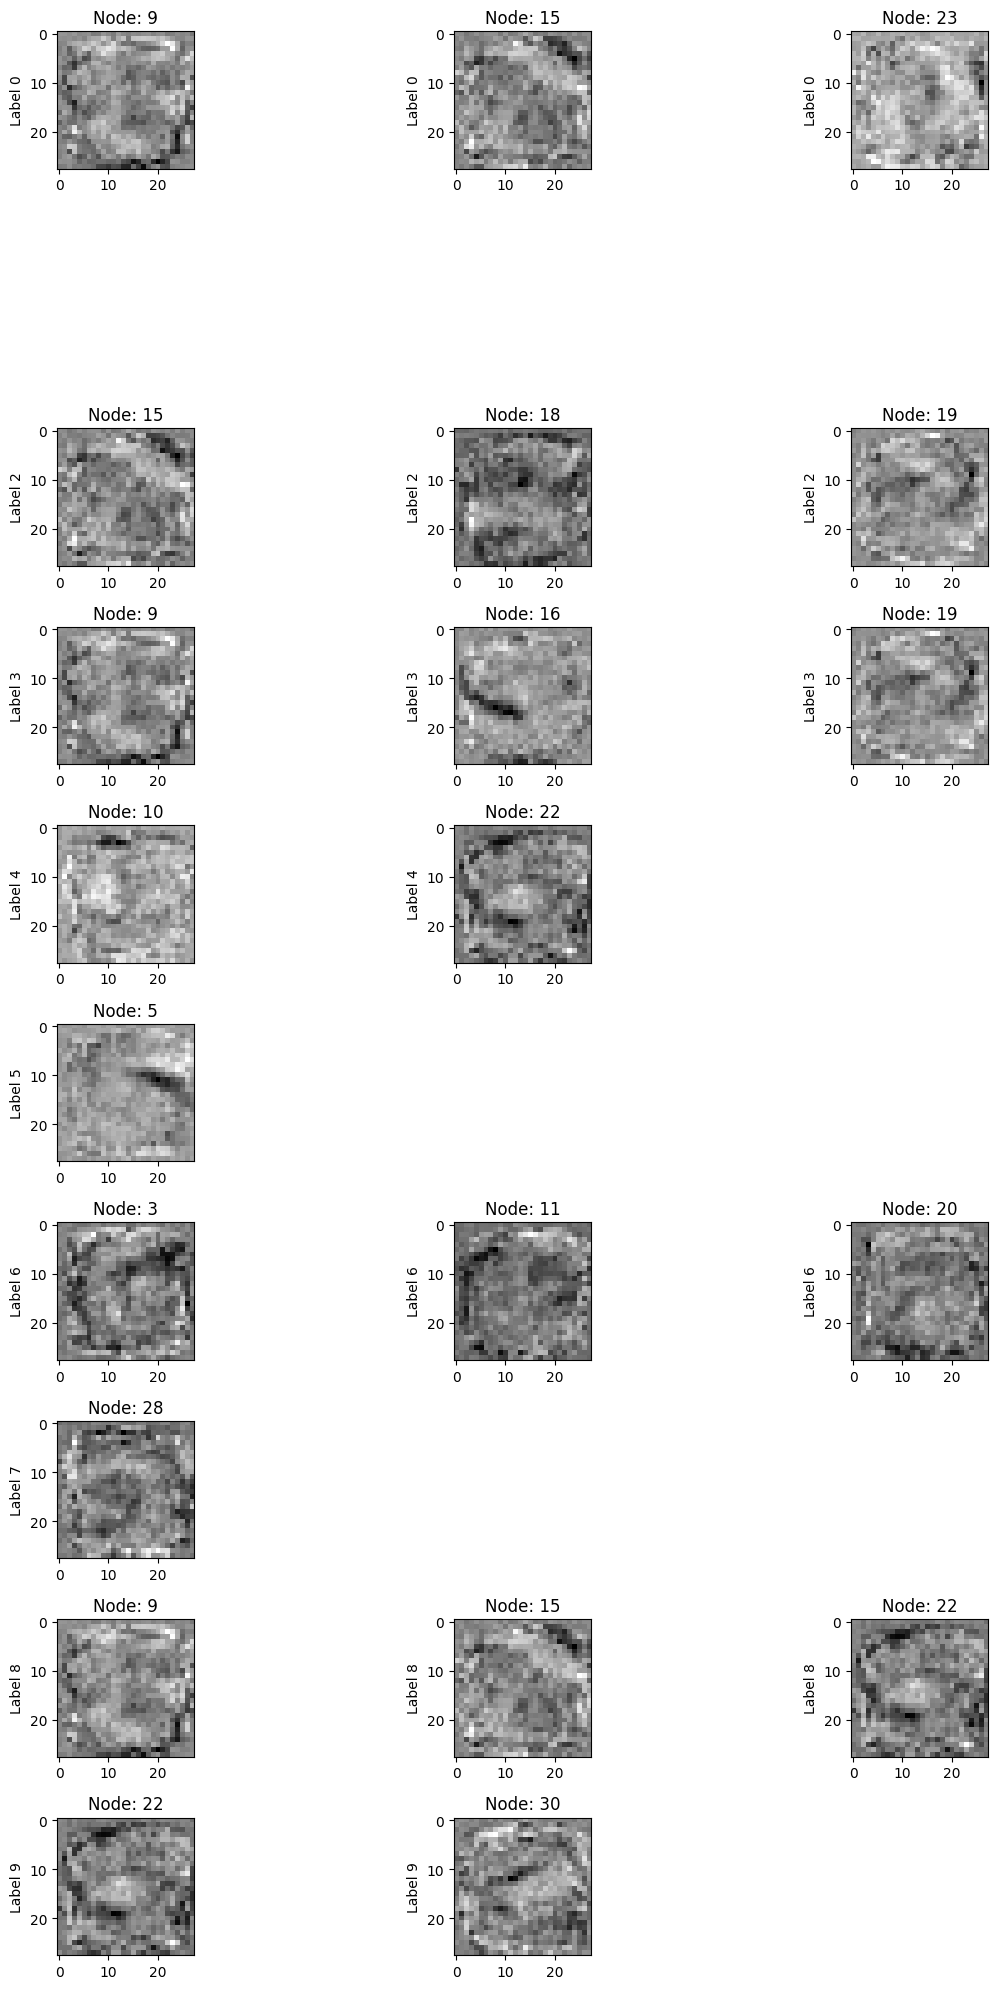

In [141]:
i = 1
plt.figure(figsize=(20,20))
for j in range(10):
    i = j * 5 + 1
    for node in df[df[j] > 4].index: 
        node_row = np.array(model.weights[0][:, node])
        plt.subplot(10, 5, i)
        i+=1
        plt.imshow(node_row.reshape(28, 28), cmap='gray')
        plt.ylabel(f"Label {j}")
        plt.title(f"Node: {node}")
plt.tight_layout()
plt.show()

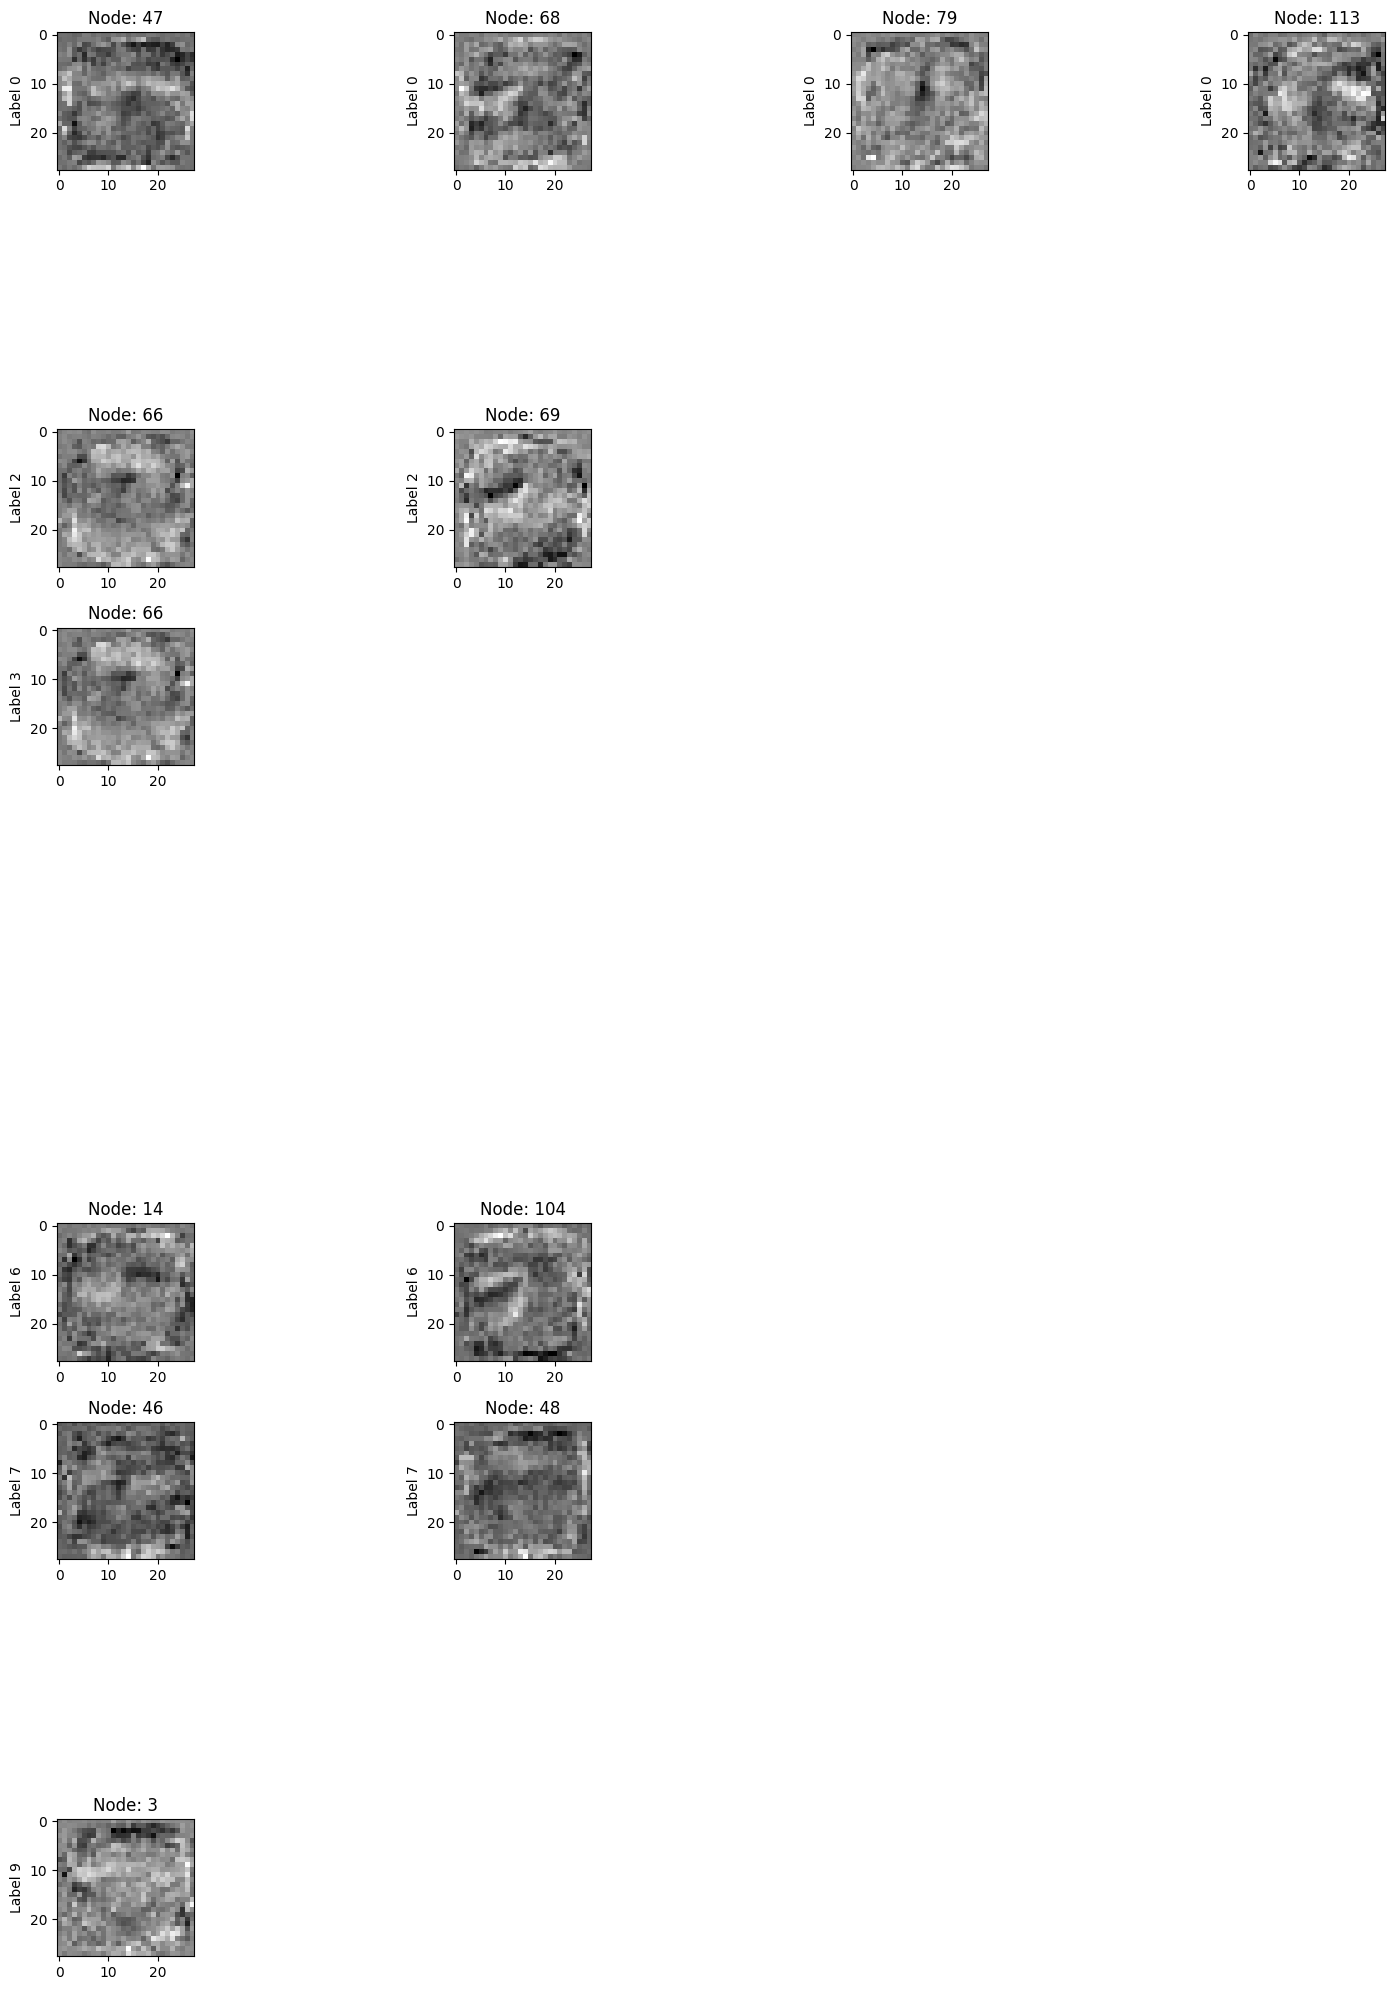

In [155]:
i = 1
start_to_second_layer = np.matmul(model.weights[0] + model.weights[1], model.weights[2]) + model.weights[3]
plt.figure(figsize=(20,20))
for j in range(10):
    i = j * 5 + 1
    for node in df_2[df_2[j] > 5].index: 
        node_row = np.array(start_to_second_layer[:, node])
        plt.subplot(10, 5, i)
        i+=1
        plt.imshow(node_row.reshape(28, 28), cmap='gray')
        plt.ylabel(f"Label {j}")
        plt.title(f"Node: {node}")
plt.tight_layout()
plt.show()

In [156]:
activations_dict_layer_2[7]

[<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
 array([[0.        , 0.27133453, 0.        , 4.048352  , 0.        ,
         1.8056111 , 0.3512498 , 0.15010217, 0.05831069, 0.        ,
         1.5788854 , 3.9198565 , 3.5596006 , 2.557737  , 0.        ,
         0.27948555, 0.        , 4.8592057 , 2.8231905 , 1.8881292 ,
         1.3298585 , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.34833562, 0.        , 0.        , 0.        ,
         0.511851  , 0.        , 0.        , 0.        , 1.9360839 ,
         0.        , 0.26792678, 0.        , 0.        , 0.24560225,
         0.        , 0.8436306 , 0.        , 0.        , 0.        ,
         2.5254185 , 8.149424  , 3.5872006 , 4.5037346 , 0.19938992,
         3.9632423 , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.5744939 , 2.0036798 , 0.39313105, 0.        , 0.        ,
         0.        , 0.10766325, 3.4855337 , 2.96055